<a href="https://colab.research.google.com/github/DavorJordacevic/KERAS-NEURAL-NETWORKS/blob/master/Keras_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving a Logistic Regression problem with Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import keras
import warnings
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
from keras.datasets import mnist
from keras.regularizers import L1L2
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# 1. Create an artificial dataset

### 1.1 Fix random seed for reproducibility

In [0]:
seed = 3
np.random.seed(seed)

### 1.2 We need to generate two sets of data

In [0]:
X, y = make_blobs(n_samples=6000, centers=2, n_features=2,random_state=40)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(6000, 2)
(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 1.3 Data visualization

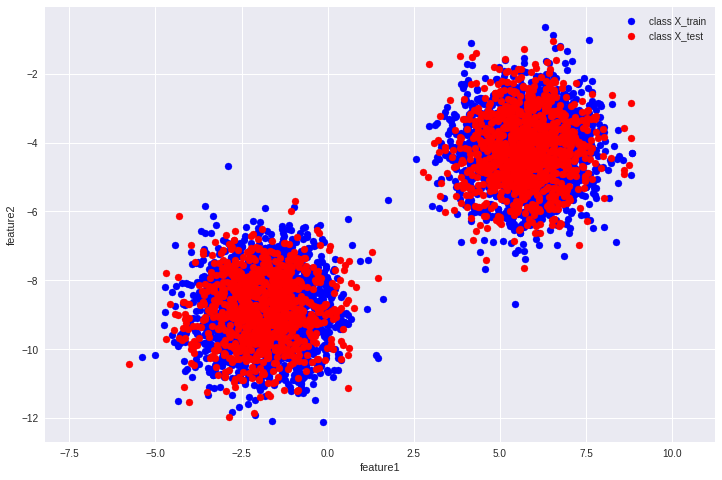

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

### 1.4 Checking the shape of the input data

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(4020, 2)
y_train:	(4020,)
x_test:		(1980, 2)
y_test:		(1980,)


# 2. Implementing a Neural Network

### 2.1 Hyperparameters

In [0]:
# Hyper-parameters
training_epochs = 100
learning_rate = 0.03
batch_size = 64

### 2.2 Creating a model

In [0]:
# create a model
def create_model():
  model = Sequential()
  model.add(Dense(1, input_dim=2, kernel_initializer='normal',
                  kernel_regularizer=L1L2(l1=0.0, l2=0.03),activation='sigmoid'))
 
  # Compile a model
  model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
  return model

model = create_model()

Instructions for updating:
Colocations handled automatically by placer.


### 2.3 Train the model

Let's trains the model for a given number of epochs.

In [0]:
results =  model.fit(
           X_train, y_train,
           epochs= training_epochs,
           batch_size = batch_size,
           validation_data = (X_test, y_test),
           verbose = 1
)

Instructions for updating:
Use tf.cast instead.


### 2.4 Test the model

The model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_proba(X_test)

### 2.5 Accuracy

In [0]:
print(np.mean(results.history["val_acc"]))

1.0


### 2.6 Evaluate the model to see the accuracy

In [0]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
4020/4020 [==============================] - 0s 15us/step
loss=0.0180, accuracy: 100.0000%
Evaluating on testing set...
1980/1980 [==============================] - 0s 16us/step
loss=0.0182, accuracy: 100.0000%


### 2.7 Summarize history for accuracy

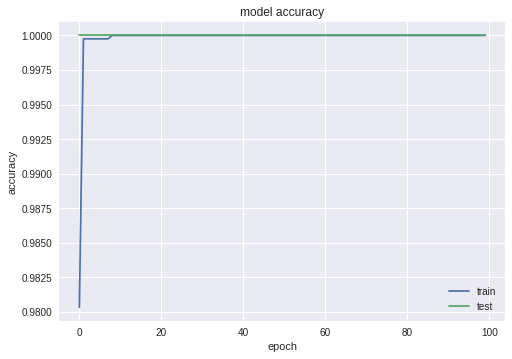

In [0]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

### 2.8 Summarize history for loss

Maximum Loss : 0.1708

Minimum Loss : 0.0180

Loss difference : 0.1527


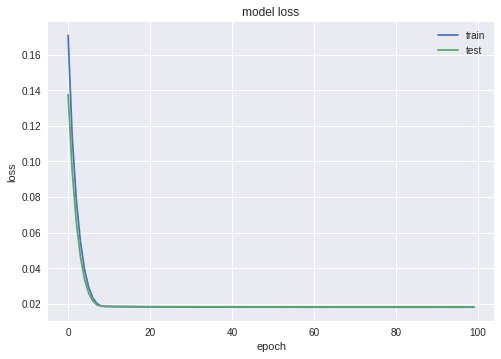

In [0]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# 3. Visualization

### 3.1 Visualization of the model predictions on our training set

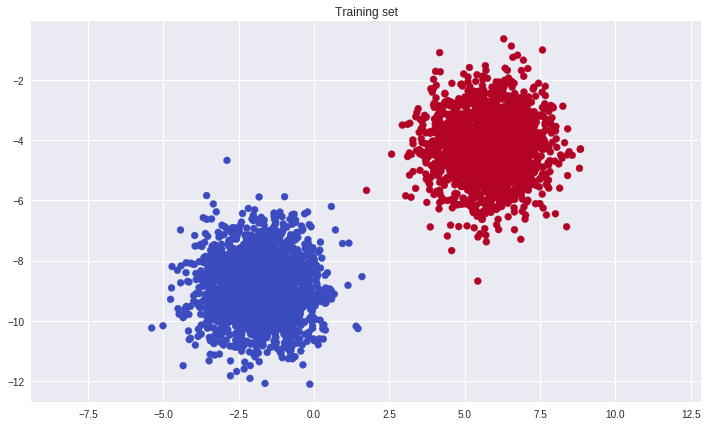

In [0]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

### 3.2 Display the weights and biases of our model

In [0]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print("Input layer weights",weights.shape,":\n",weights)
print("Input layer biases",biases.shape,":\n",biases)

Input layer weights (2, 1) :
 [[0.53528774]
 [0.3203111 ]]
Input layer biases (1,) :
 [1.0341871]


### 3.2 Visualization of the model predictions on our test set

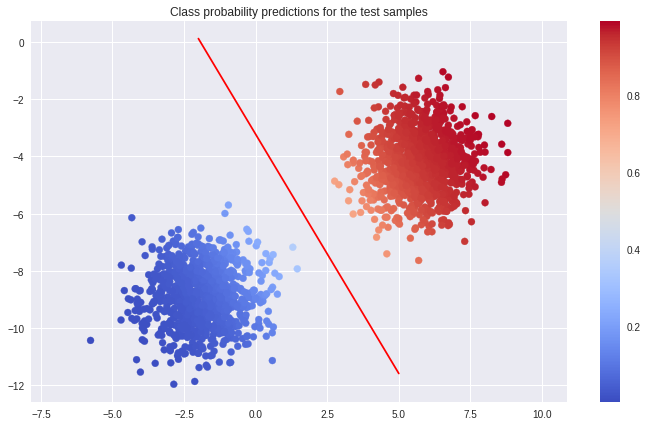

In [0]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.axis('equal');
plt.colorbar();
plt.title('Class probability predictions for the test samples')
xx = np.linspace(-2,5)
yy = -(weights[0,0]/weights[1,0])*xx - biases[0]/weights[1]
plt.plot(xx,yy,'r')

Logistic Regression – Cost Function Optimization: http://datahacker.rs/003-logistic-regression-cost-function-2/

Gradient Descent: http://datahacker.rs/003b-gradient-descent/

Gradient Descent in Python: http://datahacker.rs/003b-gradient-descent-in-python/

Logistic Regression – the Computation Graph: http://datahacker.rs/004a-computation-graph/

The Computation Graph – Example: http://datahacker.rs/004-computation-graph-2/

Logistic Regression from scratch: http://datahacker.rs/005a_logistic-regression-from-scratch/

Logistic Regression: from scratch vs. Scikit-Learn: http://datahacker.rs/logistic-regression-from-scratch-vs-scikit-learn/

Logistic Regression in TensorFlow: http://datahacker.rs/logistic-regression-in-tensorflow/

Fast Logistic Regression: http://datahacker.rs/006a-vectorizing-logistic-regression/

---



---

For more informations, visit http://datahacker.rs/ .

For more examples, visit https://github.com/DavorJordacevic.


---



---